<a href="https://colab.research.google.com/github/lelya-kos/Study-projects-Yandex.Practicum/blob/main/Intro_to_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Рекомендация тарифов

## Описание проекта

Оператор мобильной связи «Мегалайн» выяснил: многие клиенты пользуются архивными тарифами. Компании нужно проанализировать поведение клиентов и предложить пользователям новый тариф: «Смарт» или «Ультра».<br>

В нашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы. Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — она уже сделана.
Построим модель с максимально большим значением accuracy. Нужно довести долю правильных ответов по крайней мере до 0.75. Проверим accuracy на тестовой выборке.<br>

**Описание данных**<br>
Каждый объект в наборе данных — это информация о поведении одного пользователя за месяц. Известно:<br>
сalls — количество звонков,<br>
minutes — суммарная длительность звонков в минутах,<br>
messages — количество sms-сообщений,<br>
mb_used — израсходованный интернет-трафик в Мб,<br>
is_ultra — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0).<br>

In [ ]:
# В самой первой ячейке добавим код для тех библиотек, которых нет в окружении тренажера
!pip install jupyter-black

     |████████████████████████████████| 1.8 MB 1.9 MB/s eta 0:00:01
     |████████████████████████████████| 53 kB 3.9 MB/s  eta 0:00:01
  Attempting uninstall: packaging
    Found existing installation: packaging 21.3
    Uninstalling packaging-21.3:
      Successfully uninstalled packaging-21.3


In [ ]:
import jupyter_black
import pandas as pd
import warnings

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier

In [ ]:
# Загрузка автоформатера
jupyter_black.load()

# Скроем лишние предупреждения
warnings.filterwarnings("ignore")

# Настройки Pandas для вывода всех столбцов
pd.set_option("display.max_columns", None)
# Ограничение количества знаков после запятой
pd.set_option("display.float_format", "{:.2f}".format)

## Откройте и изучите файл

Откройте файл с данными и изучите его.

In [ ]:
# Откроем файл с данными и изучим его.
df = pd.read_csv("/datasets/users_behavior.csv")

In [ ]:
df.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.00,311.90,83.00,19915.42,0
1,85.00,516.75,56.00,22696.96,0
2,77.00,467.66,86.00,21060.45,0
3,106.00,745.53,81.00,8437.39,1
4,66.00,418.74,1.00,14502.75,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [ ]:
# Проверим пропуски
df.isnull().sum()

calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64

In [ ]:
# Посмотрим количество пользователей тарифами
df["is_ultra"].value_counts()

0    2229
1     985
Name: is_ultra, dtype: int64

Количество пользователей тарифа Смарт (0) - 2229, а тарифа Ультра (1) - 985 абонентов. Корректнее было бы брать одинаковое количество пользователей, но продолжим работать с дисбалансом классов.

Данные, как и было заявлено изначально, подготовлены - пропуски отстутствуют, тип данных корректный, количество строк (наблюдений) - 3214, количество столбцов (признаков) - 5.

## Разбейте данные на выборки

Разделим исходные данные на обучающую, валидационную и тестовую выборки в соотношении 3:1:1.<br>

Поскольку нам нужно проанализировать поведение пользователей конкретных тарифов, то целевым признаком будет столбец is_ultra, а остальные признаки, такие как calls, minutes, messages и mb_used, представляют собой характеристики поведения пользователей, которые будут использоваться для предсказания целевого признака.

Модель должна предсказать принадлежность к одному из двух классов (тариф «Смарт» или «Ультра»), следовательно это задача классификации.

In [ ]:
# Объявим переменные целевого и остальных признаков
features = df.drop(["is_ultra"], axis=1)
target = df["is_ultra"]

In [ ]:
# Выделим тренировочную выборку и временную выборку в пропорции 3:2
features_train, features_other, target_train, target_other = train_test_split(
    features, target, test_size=0.4, random_state=123
)
#  Выборку признаков _other поделим пополам на тренировочную и валидационную
features_test, features_valid, target_test, target_valid = train_test_split(
    features_other, target_other, test_size=0.5, random_state=123
)

In [ ]:
# Проверим количество строк в выборках
print("features_train:", features_train.shape)
print("target_train:", target_train.shape)
print("features_valid:", features_valid.shape)
print("target_valid;", target_valid.shape)
print("features_test:", features_test.shape)
print("target_test:", target_test.shape)

features_train: (1928, 4)
target_train: (1928,)
features_valid: (643, 4)
target_valid; (643,)
features_test: (643, 4)
target_test: (643,)


Данные поделены на тренировочную, валидационную и тестировочную выборки в пропорции 3:1:1 (60%:20%:20%).

## Исследуйте модели

Подберем наиболее точную модель для поставленной задачи классификации.

### Модель логистической регрессии

In [ ]:
# Инициализируем модель логистической регрессии
# с фиксированным значением random_state для воспроизводимости результатов
model_lr = LogisticRegression(random_state=1234)
model_lr.fit(features_train, target_train)  # Обучим модель на тренировочных данных

# Получим предсказания на  валидационной выборке
predictions_lr_valid = model_lr.predict(features_valid)
print(
    "Accuracy модели логиcтической регрессии на валидационной выборке:",
    accuracy_score(target_valid, predictions_lr_valid),
)

Accuracy модели логиcтической регрессии на валидационной выборке: 0.7309486780715396


Accuracy = 0.73 говорит о том, что модель логиcтической регрессии правильно предсказала классы для 73% наблюдений в валидационной выборке.
Это меньше, чем поставлено в цели исследования (добиться точности не менее 0.75), поэтому будем считать эту модель не подходящей.

### Модель Дерево решений

In [ ]:
# Создадим модель дерева решений с фиксированным значением random_state для воспроизводимости результатов
model_dtc = DecisionTreeClassifier(random_state=123)
# Обучим модель на тренировочных данных и целевой переменной
model_dtc.fit(features_train, target_train)  # Обучим модель на тренировочной выборке
predictions_valid_dtc = model_dtc.predict(
    features_valid
)  # Посчитаем точность с гиперпараметрами по умолчанию
print("Accuracy модели Дерева решений при гиперпараметре max_depth:")
print("max_depth  по умолчанию", ": ", end="")
print(accuracy_score(target_valid, predictions_valid_dtc))

# Проведем оценку производительности модели дерева решений
# при различных значениях максимальной глубины c помощью цикла
for depth in range(1, 15):
    model_dtc = DecisionTreeClassifier(max_depth=depth, random_state=123)
    model_dtc.fit(
        features_train, target_train
    )  # Обучим модель на тренировочной выборке
    predictions_valid_dtc = model_dtc.predict(
        features_valid
    )  # Получим предсказания на валидационной выборке

    print("max_depth =", depth, ": ", end="")
    print(accuracy_score(target_valid, predictions_valid_dtc))

Accuracy модели Дерева решений при гиперпараметре max_depth:
max_depth  по умолчанию : 0.7200622083981337
max_depth = 1 : 0.7558320373250389
max_depth = 2 : 0.7900466562986003
max_depth = 3 : 0.7962674961119751
max_depth = 4 : 0.7838258164852255
max_depth = 5 : 0.7713841368584758
max_depth = 6 : 0.7636080870917574
max_depth = 7 : 0.7776049766718507
max_depth = 8 : 0.7651632970451011
max_depth = 9 : 0.7744945567651633
max_depth = 10 : 0.7620528771384136
max_depth = 11 : 0.76049766718507
max_depth = 12 : 0.7480559875583204
max_depth = 13 : 0.7558320373250389
max_depth = 14 : 0.7480559875583204


 Построим график

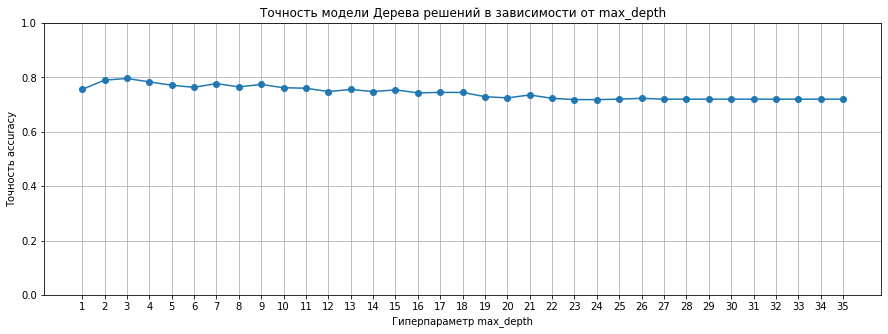

In [ ]:
# Создадим график зависимости точности модели дерева решений от от максимальной глубины дерева
import matplotlib.pyplot as plt

# Создадим списки для хранения значений глубины и точности
depths = []
accuracies = []

# Создадим цикл создания модели и вычисления accuracy по значениям max_depth
for depth in range(1, 36):
    model_dtc = DecisionTreeClassifier(max_depth=depth, random_state=123)
    model_dtc.fit(
        features_train, target_train
    )  # Обучим модель на тренировочной выборке
    predictions_valid_dtc = model_dtc.predict(
        features_valid
    )  # Получим предсказания на валидационной выборке

    accuracy = accuracy_score(target_valid, predictions_valid_dtc)  # Вычислим точность
    depths.append(depth)  # Добавим глубину и точность в список
    accuracies.append(accuracy)

# Пострим график
plt.figure(figsize=(15, 5))
plt.plot(depths, accuracies, marker="o")
plt.title("Точность модели Дерева решений в зависимости от max_depth")
plt.xlabel("Гиперпараметр max_depth")
plt.ylabel("accuracy")
plt.xticks(depths)  # Устанавливаем метки по оси X
plt.grid()
plt.ylim(0, 1)  # Устанавливаем пределы по оси Y от 0 до 1
plt.show()

Точность модели при max_depth  по умолчанию равна 0.72. При максимальной глубине деревьев от 1 до 3 точность модели растет, но с max_depth = 4 и выше точность постепенно убывает.
Лучший показатель accuracy у максимальной глубины деревьев, равной 3: 0.7962674961119751.

In [ ]:
# Попробуем подобрать минимальное количество образцов в листе - параметр min_samples_leaf при max_depth=3
for samples_leaf in range(40, 60):
    model_dtc = DecisionTreeClassifier(
        min_samples_leaf=samples_leaf, max_depth=3, random_state=123
    )
    model_dtc.fit(features_train, target_train)  # Обучим модель
    predictions_valid_dtc = model_dtc.predict(
        features_valid
    )  # Получим предсказания на валидационной выборке

    print("min_samples_leaf =", samples_leaf, ": ", end="")
    print(accuracy_score(target_valid, predictions_valid_dtc))

min_samples_leaf = 40 : 0.7962674961119751
min_samples_leaf = 41 : 0.7962674961119751
min_samples_leaf = 42 : 0.7962674961119751
min_samples_leaf = 43 : 0.7853810264385692
min_samples_leaf = 44 : 0.7853810264385692
min_samples_leaf = 45 : 0.7853810264385692
min_samples_leaf = 46 : 0.7838258164852255
min_samples_leaf = 47 : 0.7947122861586314
min_samples_leaf = 48 : 0.7947122861586314
min_samples_leaf = 49 : 0.7931570762052877
min_samples_leaf = 50 : 0.7931570762052877
min_samples_leaf = 51 : 0.7931570762052877
min_samples_leaf = 52 : 0.7931570762052877
min_samples_leaf = 53 : 0.7931570762052877
min_samples_leaf = 54 : 0.7931570762052877
min_samples_leaf = 55 : 0.7931570762052877
min_samples_leaf = 56 : 0.7931570762052877
min_samples_leaf = 57 : 0.7931570762052877
min_samples_leaf = 58 : 0.7916018662519441
min_samples_leaf = 59 : 0.7916018662519441


Значения min_samples_leaf дают примерно одинаковую точность: 0.78-0.79. Изменение этого гиперпараметра в указанном диапазоне почти не влияет на точность модели (исследовла и больший диапазон, вывод остается тот же).

Для более полного анализа производительности модели исследуем и другие гиперпараметры.

In [ ]:
# Изменим гиперпараметр criterion на entropy, ограничив глубину дерева значением 3,
# минимальное количество образцов min_samples_leaf оставим по умолчанию
model_dtc = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=3,
    random_state=123,
)

model_dtc.fit(features_train, target_train)
predictions_valid_dtc = model_dtc.predict(features_valid)
print(
    "Accuracy при criterion='entropy':",
    accuracy_score(target_valid, predictions_valid_dtc),
)

Accuracy при criterion='entropy': 0.7962674961119751


Гиперпараметр criterion=entropy тоже не изменил точность модели.

Oдинаковая точность при использовании criterion="entropy" и criterion="gini" может свидетельствовать о том, что оба метода справляются с задачей классификации с одинаковой эффективностью в данном контексте.

Итого, лучший показатель accuracy модели Дерева решений на валидационной выборке: 0.7962674961119751

### Модель Случайный лес

Поcтроим модель с другим алгоритмом классификации — Случайный лес.

In [ ]:
# Инициализируем модель классификации Случайный лес
model_rfc = RandomForestClassifier(
    random_state=123,
)
model_rfc.fit(features_train, target_train)  # обучим модель на тренировочной выборке

predictions_rfc_valid = model_rfc.predict(features_valid)

print(
    "Accuracy модели Случайный лес на валидационной выборке:",
    accuracy_score(target_valid, predictions_rfc_valid),
)

Accuracy модели Случайный лес на валидационной выборке: 0.7962674961119751


Подберем гиперпараметр количество деревьев в лесу n_estimators, дающий лучшие предсказания.

In [ ]:
best_model = None
best_result = 0

for est in range(10, 51):
    model_rfc = RandomForestClassifier(n_estimators=est, random_state=123)
    model_rfc.fit(features_train, target_train)  # Обучаем модель
    predictions_rfc_valid = model_rfc.predict(
        features_valid
    )  # Предсказания на валидационной выборке
    result = accuracy_score(target_valid, predictions_rfc_valid)  # Вычисляем точность
    if result > best_result:
        best_model = model_rfc  # Сохраняем наилучшую модель
        best_result = result  # Сохраняем наилучшее значение метрики accuracy

# Выводим результаты с использованием f-строк
print(f"Наилучшая модель: {best_model}")
print(f"Наилучшее значение accuracy: {best_result:.2f}")

Наилучшая модель: RandomForestClassifier(n_estimators=33, random_state=123)
Наилучшее значение accuracy: 0.8055987558320373


Наилучшее значение accuracy: 0.8055987558320373 показала модель Случайного леса со значением n_estimators=33

## Проверьте модель на тестовой выборке

In [ ]:
# Инициализируем модель классификации Случайный лес с n_estimators=33
model_rfc = RandomForestClassifier(n_estimators=33, random_state=123)
model_rfc.fit(features_train, target_train)  # обучим модель на тренировочной выборке

predictions_rfc_valid = model_rfc.predict(features_valid)
predictions_rfc_test = model_rfc.predict(features_test)

accuracy_valid = accuracy_score(target_valid, predictions_rfc_valid)
accuracy_test = accuracy_score(target_test, predictions_rfc_test)

print("Accuracy модели Случайного леса на выборках:")
print("Валидационная выборка:", accuracy_valid)
print("Тестовая выборка:", accuracy_test)

Accuracy модели Случайного леса на выборках:
Валидационная выборка: 0.8055987558320373
Тестовая выборка: 0.8195956454121306


Результаты точности модели Случайного леса на тестовой выборке выше, чем на валидационной.
Следовательно, лучшей по точности моделью следует принять модель Случайного леса с гиперпараметром n_estimators=33.

## (бонус) Проверьте модели на адекватность

Дополнительное задание: проверьте модели на вменяемость. Ничего страшного, если не получится: эти данные сложнее тех, с которыми вы работали раньше. В следующем курсе подробнее об этом расскажем.

Проверим полученную модель на адекватность с помощью DummyClassifier, который использует стратегию "most_frequent", и позволяет оценить базовую производительность модели.

In [ ]:
# Проверим на адекватность с помощью DummyClassifier
dummy_clf = DummyClassifier(
    strategy="most_frequent", random_state=123
)  # Обучим модель DummyClassifier
dummy_clf.fit(features_train, target_train)  #
predictions_test = dummy_clf.predict(features_test)
accuracy_dummy = accuracy_score(target_test, predictions_test)

print("Точность модели DummyClassifier:", accuracy_dummy)

# Сравнение моделей
if accuracy_test > accuracy_dummy:
    print("Модель RandomForestClassifier, лучше чем DummyClassifier.")
else:
    print("Модель DummyClassifier лучше или равна RandomForestClassifier.")

Точность модели DummyClassifier: 0.6982892690513219
Модель RandomForestClassifier, лучше чем DummyClassifier.


В ходе исследования получены результаты, которые показывают точности двух моделей DummyClassifier: 0.698 и RandomForestClassifier: 0.82.

Модель RandomForestClassifier показывает более высокую точность, а значит, лучше справляется с задачей классификации, чем простая стратегия выбора наиболее частого класса DummyClassifier.

## Выводы исследования


Подведем итоги проведенного исследования.<br>

Цель исследования - разработка модели, подбирающей пользователям мобильной связи тарифы «Смарт» или «Ультра»на основании поведения клиентов, уже перешедших на эти тарифы, с долей правильных ответов выше 0.75. <br>

Был произведен обзор данных. Данные, как и было заявлено изначально, не требуют подготовки - пропуски отстутствуют, тип данных корректный, количество строк (наблюдений) - 3214, количество столбцов (признаков) - 5. Отмечено, что данные содержат разное количество пользователей тарифа Смарт (0) - 2229, а тарифа Ультра (1) - 985 абонентов.<br>

Целевым признаком считаем столбец is_ultra, а остальные признаки, такие как calls, minutes, messages и mb_used, отнесены к характеристикам поведения пользователей, которые будут использоваться для предсказания целевого признака. <br>

Данные поделены на тренировочную, валидационную и тестировочную выборки в пропорции 3:1:1 (60%:20%:20%)<br>

Модель должна предсказать принадлежность к одному из двух классов (тариф «Смарт» или «Ультра»).<br>

В ходе исследования построены три модели задачи классификации.<br>

1) Accuracy модели логиcтической регрессии равна 0.73.<br>

2) Точность модели Дерево решений с гиперпараметрами по умолчанию составило 0.72. <br>
С помощью цикла удалось выявить лучший показатель accuracy у максимальной глубины деревьев, равной 3 - 0.796. <br>
Изменение  гиперпараметра минимального количество образцов, которые должны находиться в листовом узле, min_samples_leaf и критерия разбиения criterion="entropy" не повысило точность модели выше 0.796.<br>
Итого, лучший показатель accuracy модели Дерева решений на валидационной выборке составил 0.796.

3) Accuracy модели Случайный лес на валидационной выборке: 0.796. <br>
С помощью цикла подбрали гиперпараметр количества деревьев в лесу n_estimators (n_estimators=33), показывающий наилучшее значение точности 0.81. Это лучший показатель точности среди исследованных моделей, следовательно, лучшей по точности моделью следует принять модель Случайного леса с гиперпараметром n_estimators=33. <br>

Проведена проверка модели Случайного леса при (n_estimators=33) на тестовой выборке.
Результаты точности модели Случайного леса на тестовой выборке выше, чем на валидационной - 0.82.<br>

В ходе исследования на адекватность получены результаты, которые показывают точности двух моделей DummyClassifier: 0.698 и RandomForestClassifier: 0.81. Модель RandomForestClassifier показывает более высокую точность, а значит, лучше справляется с задачей классификации, чем простая стратегия выбора наиболее частого класса. <br>

Таким образом, модель RandomForestClassifier с гиперпараметром количество деревьев в лесу n_estimators=33 может быть применен для предложения пользователям перейти с архивного на новый тариф «Смарт» или «Ультра».


## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x] Jupyter Notebook открыт
- [x] Весь код исполняется без ошибок
- [x] Ячейки с кодом расположены в порядке исполнения
- [x] Выполнено задание 1: данные загружены и изучены
- [x] Выполнено задание 2: данные разбиты на три выборки
- [x] Выполнено задание 3: проведено исследование моделей
    - [x] Рассмотрено больше одной модели
    - [x] Рассмотрено хотя бы 3 значения гипепараметров для какой-нибудь модели
    - [x] Написаны выводы по результатам исследования
- [x] Выполнено задание 3: Проведено тестирование
- [x] Удалось достичь accuracy не меньше 0.75
